In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, roc_curve, auc, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv("D:/Chools/Day_06/Universities.csv")

In [3]:
df.head()


,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
# Remove the duplicates
df.isnull().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [12.5, 12.5, 56.25, 56.25],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [105.0, 105.0, 130.0, 130.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [193.75, 193.75, 232.5, 232.5],
  [162.5, 162.5, 213.125, 213.125],
  [117.5, 117.5, 187.8125, 187.8125],
  [90.0, 90.0, 152.65625, 152.65625],
  [34.375, 34.375, 121.328125, 121.328125]],
 'dcoord': [[0.0, 370.0729657783719, 370.0729657783719, 0.0],
  [0.0, 1502.1946167746264, 1502.1946167746264, 370.0729657783719],
  [0.0, 31.953090617340916, 31.953090617340916, 0.0],
  [0.0, 401.22686849212874, 401.2268684

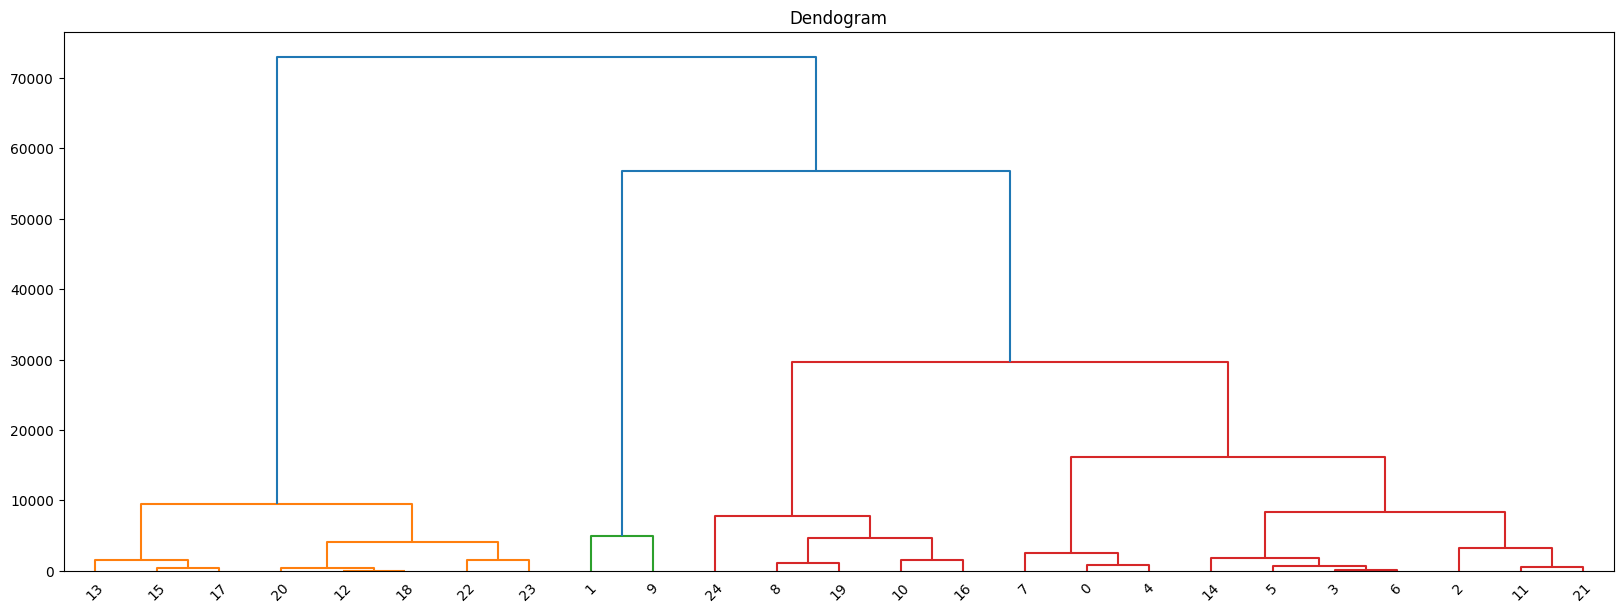

In [9]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize = (20,7))
plt.title('Dendogram')

## create Dendogram
sc.dendrogram(sc.linkage(df.drop(['Univ'],axis=1),method= 'ward'))